/Users/wmalik/Documents/MSc/sartaj_zain_recommend/Gat2conv/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


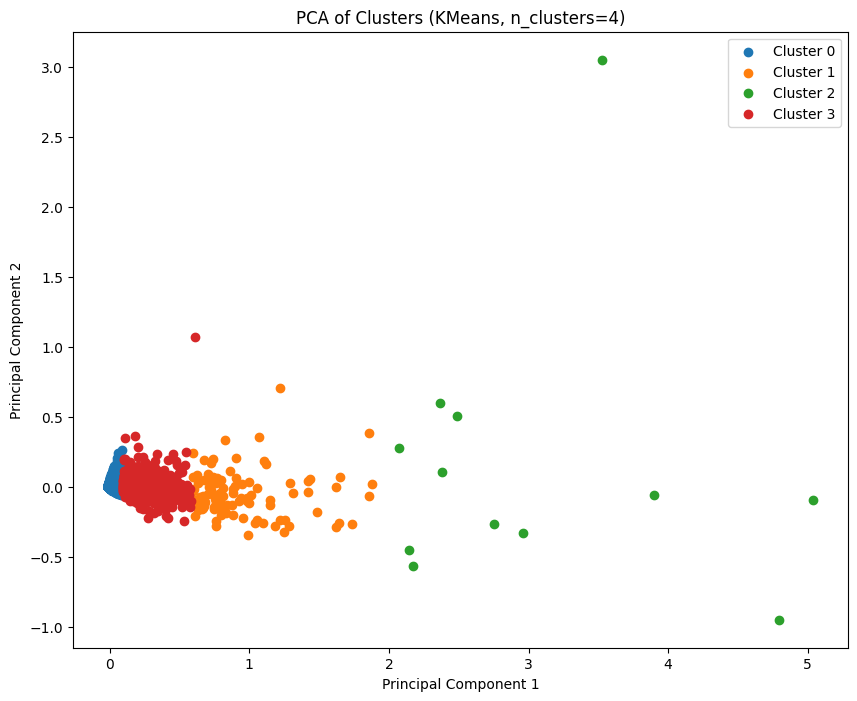

n_clusters: 4
Silhouette Score: 0.8852983898445425
Davies-Bouldin Index: 1.0376450008831564



/Users/wmalik/Documents/MSc/sartaj_zain_recommend/Gat2conv/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


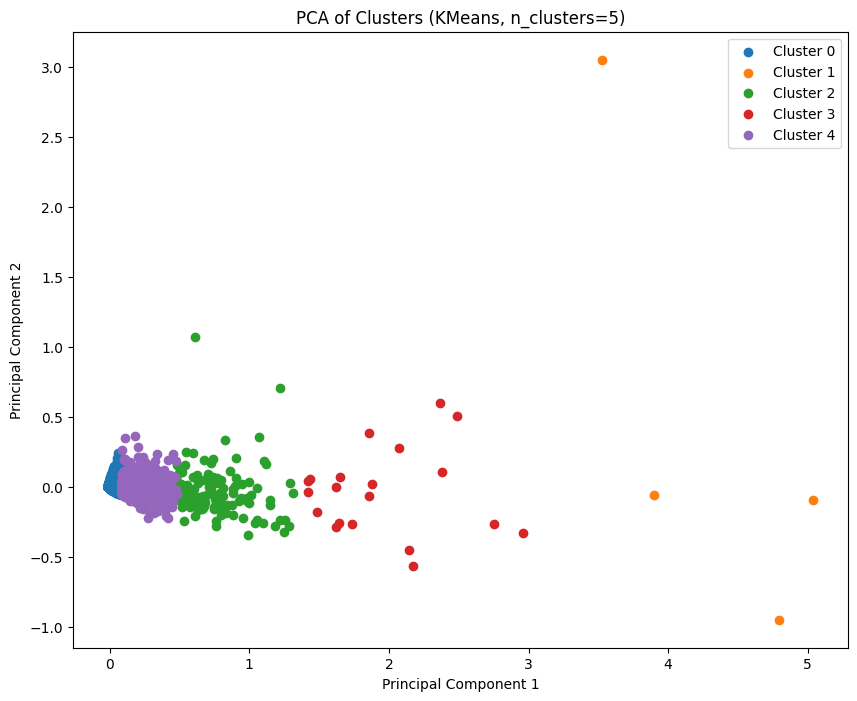

n_clusters: 5
Silhouette Score: 0.8760954156142569
Davies-Bouldin Index: 1.0988778943480946



/Users/wmalik/Documents/MSc/sartaj_zain_recommend/Gat2conv/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


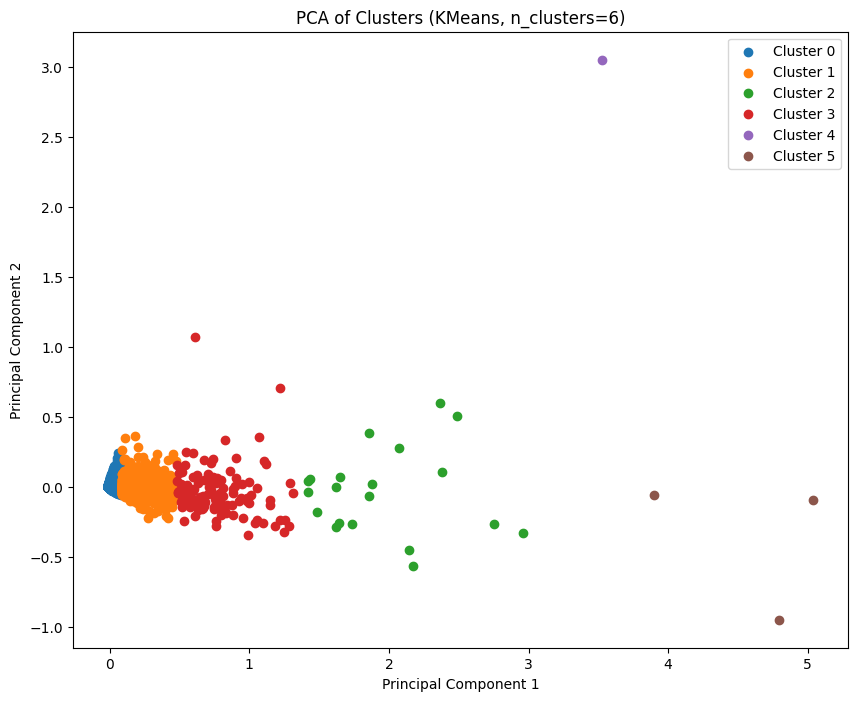

n_clusters: 6
Silhouette Score: 0.8761064391327259
Davies-Bouldin Index: 0.8978722636661245



In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load the data
df_features = pd.read_csv('normalized_sector_grouped_investors.csv')
category_columns = df_features.columns[1:]
df_clean = df_features.dropna(subset=category_columns)

# Number of clusters to evaluate
n_clusters_values = [4, 5, 6]

for n_clusters in n_clusters_values:
    # Initialize and fit the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df_clean['Cluster'] = kmeans.fit_predict(df_clean[category_columns])

    # Save the results
    df_clean.to_csv(f'df_features_with_clusters_kmeans_{n_clusters}.csv', index=False)

    # Perform PCA for visualization
    pca = PCA(n_components=2)
    pca_dims = pca.fit_transform(df_clean[category_columns])
    pca_dims = pd.DataFrame(pca_dims, columns=['PC1', 'PC2'])

    # Plot the clusters
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    for cluster in np.unique(df_clean['Cluster']):
        ix = df_clean['Cluster'] == cluster
        ax.scatter(x=pca_dims.loc[ix, 'PC1'], y=pca_dims.loc[ix, 'PC2'], label=f'Cluster {cluster}')
    ax.legend()
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA of Clusters (KMeans, n_clusters={n_clusters})')
    plt.show()

    # Calculate evaluation metrics
    silhouette_avg = silhouette_score(df_clean[category_columns], df_clean['Cluster'])
    davies_bouldin = davies_bouldin_score(df_clean[category_columns], df_clean['Cluster'])

    print(f'n_clusters: {n_clusters}')
    print(f'Silhouette Score: {silhouette_avg}')
    print(f'Davies-Bouldin Index: {davies_bouldin}\n')